In [3]:
pip install mglearn

     |████████████████████████████████| 542kB 4.4MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=04d645efbdc48275868596c62aaa90148e834595add43792ee9b820c59811a77
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [4]:
from sklearn.neural_network import MLPClassifier

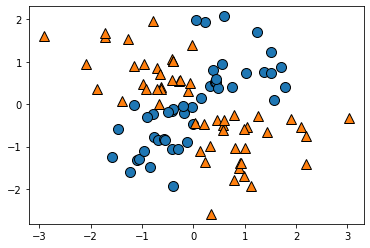

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import mglearn

#200개의 데이터, feature = 2개
np.random.seed(30)
X = np.random.randn(100, 2)
y = np.logical_xor(X[:, 0]>0, X[:, 1]>0)
y = np.where(y, 1, -1)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   shuffle=True)

직접 해보세요.  
1번째 은닉층 : 노드 10개  
2번째 은닉층 : 노드 5개  
3번째 은닉층 : 노드 3개  

In [ ]:
model_pctr = MLPClassifier(hidden_layer_sizes=([10, 5, 3]), max_iter=int(1e+05)) #다층 퍼셉트론

In [ ]:
model_pctr.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[10, 5, 3], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
model_pctr.score(X_train, y_train)

1.0

In [ ]:
model_pctr.score(X_test, y_test)

0.95

#### parameter 
- activation  
1) default : relu  
2) logistic  
3) tanh (sigmoid 일종)  
4) indentity : linear  
  
- solver   
1) default : adam  
2) lbfgs   
3) sgd : stochastic(확률적) gradient decent  
  
- alpha : l2 norm 규제 정도 (Ridge regression과 동일)
  
- tol : cost 가 학습을 멈추는 기준 값 (cost = tol 일 될때까지)
  
- max_iter : optimizing 최대 반복 수

In [ ]:
model_pctr.coefs_, model_pctr.intercepts_

([array([[-1.36793434,  0.05119921,  1.13562018,  0.13215694, -1.44548939,
          -1.53281609, -0.15878082,  0.98448852,  0.39099257,  0.82639097],
         [-1.11326015,  1.03616278,  0.31202691,  0.9235838 , -0.34307751,
          -0.21984831, -1.41466046,  0.19642247,  1.47238311, -0.53757321]]),
  array([[-0.46629291,  0.97900629, -0.71912831,  0.38033991, -0.01841931],
         [-0.71925527,  0.84795304, -0.41142365,  0.97879651, -0.16062846],
         [-0.1896937 ,  0.80138236, -0.31158955, -0.65555349, -0.31876043],
         [-0.87424437, -0.32391624, -0.50535639,  0.86773917, -0.21332729],
         [ 0.87562853, -0.63939079, -0.82187048,  1.13756121,  0.02918129],
         [-0.05696983, -0.32710667, -0.94504297,  0.98504977, -0.32555687],
         [ 1.18423888,  0.19420676,  0.9786511 , -0.52438708, -0.20535756],
         [ 0.35348145,  0.55975669,  0.76755755, -0.34258354,  0.39384602],
         [-1.57890454,  0.26473778, -0.91259423,  0.57437061, -0.33662623],
         [ 0

In [ ]:
#각 층의 coef 개수
for i, coef in enumerate(model_pctr.coefs_):
    print('hidden_layer_{}_weight_no: {}'.format(i, coef.shape))

hidden_layer_0_weight_no: (2, 10)
hidden_layer_1_weight_no: (10, 5)
hidden_layer_2_weight_no: (5, 3)
hidden_layer_3_weight_no: (3, 1)


총 weight 의 개수는 ?  
coef_ 몇 개인가?  
intercept_ 몇 개인가?  

  
  각 층마다의 coef_ intercept 는 몇개씩인가?  

출력해보세요.

In [ ]:
model_pctr.intercepts_[0].shape

(10,)

In [ ]:
n_weight = 0
n_coef, n_intercept = 0, 0
print('각 층의 가중치, 바이어스 개수')
for coef, intercept in zip(model_pctr.coefs_, model_pctr.intercepts_):
    print(coef.shape[0] * coef.shape[1], intercept.shape[0])
    n_coef += coef.shape[0] * coef.shape[1]
    n_intercept += intercept.shape[0]
print(n_coef, n_intercept)
n_weight += (n_coef + n_intercept)
print('총 가중치의 개수는 {}입니다'.format(n_weight))

각 층의 가중치, 바이어스 개수
20 10
50 5
15 3
3 1
88 19
총 가중치의 개수는 107입니다


In [ ]:
#graph, dataset 확장 패키지
def result_visualization(model, X, y):
    mglearn.plots.plot_2d_separator(model, X,
                                    fill=True, alpha=.1)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

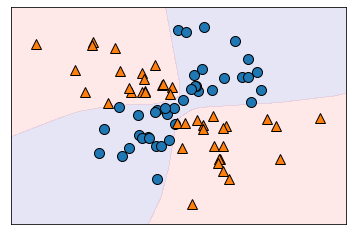

In [ ]:
result_visualization(model_pctr, X_train, y_train)

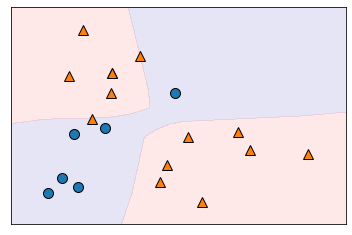

In [ ]:
result_visualization(model_pctr, X_test, y_test)

사람 얼굴 인식 문제

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
face_data = fetch_olivetti_faces()
print(face_data.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [ ]:
face_data.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [ ]:
face_data.data.shape

(400, 4096)

In [ ]:
face_data.images.shape

(400, 64, 64)

In [ ]:
face_data.target.shape

(400,)

1) 데이터의 총 개수는?  
2) 하나의 데이터가 갖고 있는 X_feature의 개수는?  
3) 다중 클래스 문제인가?  
4) 클래스의 개수는?  

1) 400  
2) 4096  
3) 다중클래스  
4) 40

1) 적정한 층 수는?  
2) 각 층의 노드는 몇 개가 적당한가?  
3) 총 가중치의 개수는? (coef + weight)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# 모델 선택
model = MLPClassifier(hidden_layer_sizes=([80, 40]))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(face_data.data, face_data.target)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[80, 40], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
model.score(X_train, y_train)

1.0

In [ ]:
model.score(X_test, y_test)

0.81